# Define the linear chirp signal and plot it.

#### Zu-Cheng Chen, Feb 2019

In [1]:
# load packages
using Plots
using FFTW
import LinearAlgebra:norm

## Define the linear chirp signal.
The signal is given by
$$
s(t) = A \sin(2\pi (f_0 t + f_1 t^2) + \phi_0),
$$
where $A$ is the $snr$.

In [2]:
"""
LCSig(dataT, snr, b, f0, f1) generates a frequency modulated (FM) 
sinusoid S. dataT is the vector of time stamps at which the samples 
of the signal are to be computed. snr is the matched filtering 
signal-to-noise ratio of S, and [b, f0, f1] are three coefficients that 
parametrize the phase of the signal: 
2π*f0*t + b*cos(2π*f1*t).
"""
function LCSig(dataT, snr::Real, f0::Real, f1::Real, ϕ0::Real)
    phaseVec = 2π*(f0*dataT + f1*dataT.^2) .+ ϕ0;
    sigVec = sin.(phaseVec);
    sigVec = snr*sigVec/norm(sigVec)
end

# test the function
LCSig(1, 1, 1, 1, 1), LCSig([1,2], 1, 1, 1, 1)

(1.0, [0.707107, 0.707107])

In [3]:
?LCSig

search: LCSig lowercasefirst portfoliocomposition portfoliocomposition!



LCSig(dataT, snr, b, f0, f1) generates a frequency modulated (FM)  sinusoid S. dataT is the vector of time stamps at which the samples  of the signal are to be computed. snr is the matched filtering  signal-to-noise ratio of S, and [b, f0, f1] are three coefficients that  parametrize the phase of the signal:  2π*f0*t + b*cos(2π*f1*t).


## Plot the signal.

In [4]:
#Set signal parameters.
snr = 10;
f0 = 20;
f1 = 20;
ϕ0 = π;

In [5]:
#Instantaneous frequency after 1 sec.
maxFreq = 2π*(f0 + f1) + ϕ0;
samplFreq = 5*maxFreq;
samplIntrvl = 1/samplFreq;

In [6]:
#Time samples.
times = collect(0:samplIntrvl:1.0);

# Number of samples
nSamples = length(times);

# Generate the signal.
signals = LCSig(times, snr, f0, f1, ϕ0);

### Plot the signal.

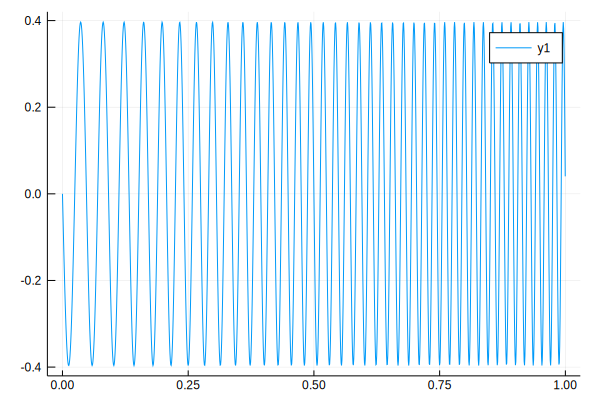

In [7]:
plot(times,signals)

### Plot the periodogram.

In [8]:
# Length of data 
dataLen = times[end]-times[1]

# DFT sample corresponding to Nyquist frequency
kNyq = Int(floor(nSamples/2)+1)

# Positive Fourier frequencies
posFreq = (0:(kNyq-1))*(1/dataLen);

# FFT of signal
fftSig = fft(signals);

# Discard negative frequencies
fftSig = fftSig[1:kNyq];

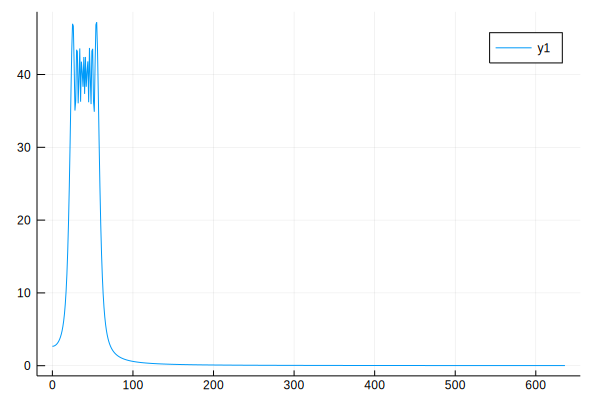

In [9]:
# Plot periodogram
plot(posFreq,abs.(fftSig))